<h1><center>Titanic Survival Prediction

## Problem Statement:

The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.  One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Complete the analysis of what sorts of people were likely to survive and predict which passengers survived the tragedy.


## Hypothesis:
1. Children, women and the elderly are more likely to survive than other male adults.
2. Persons who paid higher fares are more likely to survive.
3. Persons in a higher class are more likely to survive than those in lower class.

In [1]:
#Libraries
import numpy as np #For arrays and mathematical computations
import pandas as pd # For the dataframe management and manipulation
import sklearn as sk # For utilizating machine learning algorithms
import seaborn as sb # for creating beautiful plots
import matplotlib.pyplot as mp # for quick plots
%matplotlib inline 

## Data Acquisition

Viewing the data collected on the first 10 persons in the dataset

In [2]:
#Read Data from File
location = r"C:\Users\Latoya Clarke\Documents\Python Scripts\train.csv"
titanic = pd.read_csv(location)
titanic.loc[:9]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The Columns Age and field are showing that their are missing values.
It may also be seen that several numeric fields such as Survived and Pclass are categorical variables.

##  Data Exploration

### Variable Identification

Target Variable: **Survived** 

Predictor Variable: **Pclass, Sex, Age, Fare**

### Univariate Analysis

Looking at the general summary of the entire dataset

In [3]:
# View dataset summary
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 12 columns):
PassengerId    691 non-null int64
Survived       691 non-null int64
Pclass         691 non-null int64
Name           691 non-null object
Sex            691 non-null object
Age            548 non-null float64
SibSp          691 non-null int64
Parch          691 non-null int64
Ticket         691 non-null object
Fare           691 non-null float64
Cabin          155 non-null object
Embarked       690 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 64.9+ KB


The dataset has 12 columns and 691 data entries.
The values above it is shown that Age, Cabin and Embarked have less values than the other fields therefore have values that are missing.

Viewing the statistical summary of the numerical continous fields, excluding categorical fields

In [4]:
# drop() used to remove fields from dataset

# view stats summary
titanic.drop(['PassengerId', 'Survived', 'Pclass'],axis=1).describe()

,Age,SibSp,Parch,Fare
count,548.000000,691.000000,691.000000,691.000000
mean,29.921989,0.538350,0.387844,32.276103
std,14.598391,1.076585,0.821855,48.447543
min,0.750000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,15.000000
75%,38.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,6.000000,512.329200


Statistical summary shows that:
1. A person may have 0 to 6 Parents & Children combined on board.
2. A person may also have Siblings & Spouses up combined up to 8 persons on board.
3. The prices of the fares paid was an extremely wide variability up to 512.39 currency units used in that period.
4. Seventy-five percent of the persons onboard were 35 or younger and surprizingly seventy-five percent of the fare prices were up to 31.75 currency units.


Checking the strength of correlation between indivudal variables and Survived

In [5]:
#Find variable correlation
titanic.drop(['PassengerId'],axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.318885,-0.077312,-0.033896,0.061689,0.229339
Pclass,-0.318885,1.000000,-0.373770,0.090793,0.013490,-0.568966
Age,-0.077312,-0.373770,1.000000,-0.331680,-0.206289,0.085428
SibSp,-0.033896,0.090793,-0.331680,1.000000,0.402487,0.160064
Parch,0.061689,0.013490,-0.206289,0.402487,1.000000,0.230892
Fare,0.229339,-0.568966,0.085428,0.160064,0.230892,1.000000


Variables that seem to correlate moderately with the Survived field were found to be Parch which correlated positively and Age which correlated negatively. Variables with weaker negative correlations were Pclass & SibSp. Fare was a weak positive correlation. It is also seen that SibSp and Pclass correlate strongly. The Number of Parents/Children (Parch) will also be considered for the analysis 

Assessing the count of the categorical variables: Sex and Embarked to see their frequencies

In [6]:
#Filter categorical variables
categorical_columns = [x for x in titanic.dtypes.index if titanic.dtypes[x]=='object']

#Exclude ID and irrelevant columns:
categorical_columns = [x for x in categorical_columns if x not in ['PassengerId', 'Cabin','Name', 'Ticket']]

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories: %s'%col)
    print(titanic[col].value_counts())
    
#More males than females were onboard the ship
# More persons Embarked the ship at location S, vs the location C and Q. The last number of persons embarked at location Q


Frequency of Categories: Sex
male      442
female    249
Name: Sex, dtype: int64

Frequency of Categories: Embarked
S    497
C    131
Q     62
Name: Embarked, dtype: int64


The gender population present of the titanic showed more men than women. The location embarked most popular and most likely the first place docked was location S, followed by C and Q.

Looking Further into the distribution of Fares and Age fields with a boxplot showing percentiles distribution

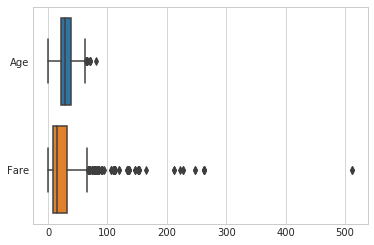

In [7]:
# plot boxplot of Age and Fare 
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");

The Age data shown in graph above seems to be more evenly distributed with a few acceptable outliers. The distribution of Fare prices shows a heavy left skew with data points being concentrated in the 30 currency units regions, following with outliers to the opposite side with as great as prices for 500 currency units. 

Finding the different levels of passenger classes on the Titanic

In [8]:
# Show the levels of classes
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

The Titanic had 3 passenger classes: Class 1, 2 and 3

### Bivariate Analysis

Showing a count of the number of males and females that either survived or died

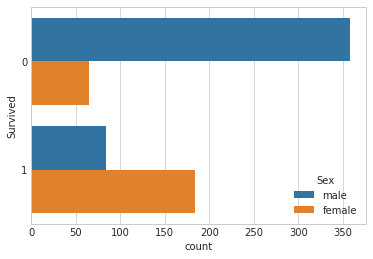

In [9]:
# Showing people who survived/died by sex
with sb.axes_style('whitegrid'):
    sb.countplot(data=titanic, y ='Survived', hue='Sex')

Figure shows that significantly more males died than females did as well it shows that more than twice as much females survived than males.

Viewing the frequency of Survival based on the different Passenger Classes with countplot

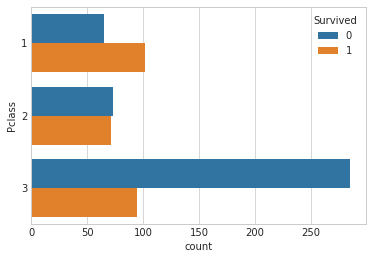

In [10]:
# Showing frequency of survived by Passenger Class
with sb.axes_style('whitegrid'):
    sb.countplot(data=titanic, hue ='Survived', y='Pclass')

Passenger Class 3 seemed to have the largest amount of persons thus can be thought of as the lowest class with significantly more persons dying than the other two classes. Passengers in class one seemed to have had a higher survival rate probably due to this being the highest class. Passengers in class 2 made almost equal amounts of persons who survived vs died.

Investigating the average age of persons whom survived vs those who died using a bargraph

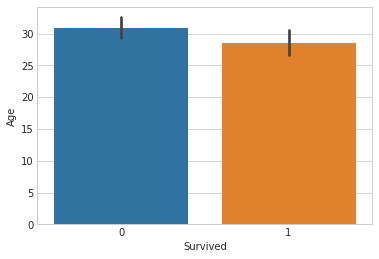

In [11]:
# Showing average ages by survived
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', estimator = np.mean)

Figure shows that persons that died had a greater average age (over 30 years) than the persons that survived (under 30 years)

Investigating the average ages of those passengers that survived or died per passenger class 

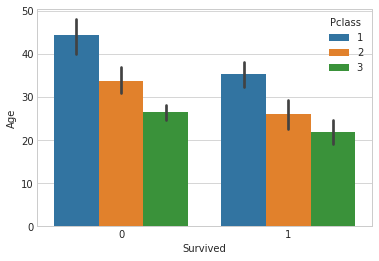

In [12]:
# Showing average ages of passengers survived by class
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Pclass', estimator = np.mean)

Figure shows the average ages of persons that survived have relatively lower than the persons that died thus making youth an important factor in survival of Titanic. 


Investigating the ratio of survived to died of passengers based on area of Embarkment

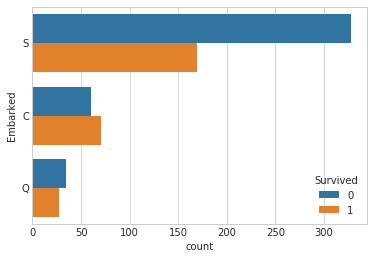

In [13]:
# Showing total servived ages by Embarked
with sb.axes_style('whitegrid'):
    sb.countplot(data=titanic, y = 'Embarked', hue ='Survived')

The passengers that embarked at S had a lowest percentage survival rate per Embarked than the passengers embarked at locations C and Q. At Location C, the survival rate is highest as more persons survived than died. Location Q had the second highest survival rate.

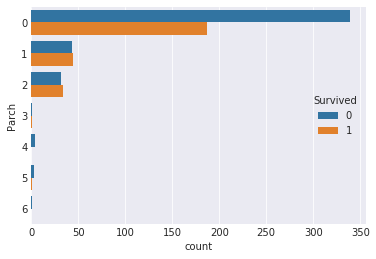

In [14]:
# Showing the number of Parch by Survival
with sb.axes_style('darkgrid'):
    sb.countplot(data=titanic, y = 'Parch', hue ='Survived')

Most passengers did not have any children or parents on the Titanic. Passengers that had 1 or 2 child or parent on board per Parch, they are more likely to survive than die. Passengers having a combination 6 or 4 parents or children on board did not survive.

### Missing Value Treatment

Treating the Age variable by using the average age to replace Nan Values

In [15]:
#Filling the missing age values with the average age of the dataset
titanic['Age']= titanic['Age'].fillna(int(titanic['Age'].mean()))
print('Missing values remaining: ', titanic.Age.isnull().any())

Missing values remaining:  False


Treating the Embarked Variable by using the mode of Embarked to replace Nan values

In [16]:
# Finding the mode of the Embarked field
titanic['Embarked'].mode()

# Using the mode 'S' is used to fill the missing value in Embarked field
titanic['Embarked'] = titanic['Embarked'].fillna('S')
print('Missing values remaining: ', titanic.Embarked.isnull().any())

Missing values remaining:  False


### Outlier Detection and Treatment

From past analysis, Fare and Age variables seemed to have several values outside the whiskers of the bloxplot. Since the Ages variance was relatively small, this will not be considered an outlier. Fare prices on the other hand needs to be investigated. Looking at the number of records with fares over 200 currency units.

In [17]:
#Counting all fares above $200
titanic.query('Fare > 200').count()



PassengerId    14
Survived       14
Pclass         14
Name           14
Sex            14
Age            14
SibSp          14
Parch          14
Ticket         14
Fare           14
Cabin          11
Embarked       14
dtype: int64

This shows that 14 records have fare above 200. Now Let's view these 14 records to see the validity of these high prices:

In [18]:
#Viewing the dataset above Fare $200
titanic.query('Fare > 200')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


The ticket seem to be valid for Fares over 500 since more than one person has the same ticket number the same price.

Counting and viewing to find others with similar tickets:

In [19]:
# Counting the number of Tickets PC 17755 in dataset
titanic.loc[titanic['Ticket'] == 'PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Search results show only 2 tickets which are the ones for 512.3292 have that same number and embarked that the same location therefore it is valid and will not be addressed.

### Discussion & Conclusion
.....

These feature variables (**Age, Parch, Fare, Pclass**) are the ones that will be used for the prediction model


## Model Building

In [20]:
#Creating labels for the dataset
y = np.array(titanic.Survived)

In [21]:
#Creating features for training
titanic_selected = titanic.drop(['PassengerId','Survived','Cabin', 'Ticket', 'SibSp'], axis = 1)
X= titanic_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [22]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#The data has been split using 80% for training and 20% for testing

**visualization train & test and test data should be here**

Random Forests Algorithm<br/>
Random forests follow a technique known bagging (also known as Bootstrap aggregation). This is an ensemble technique where a number of decision trees are built based on subsets of data and an aggregation of the predictions is used as the final prediction.

An illustration of this technique can be seen in the graphic below:

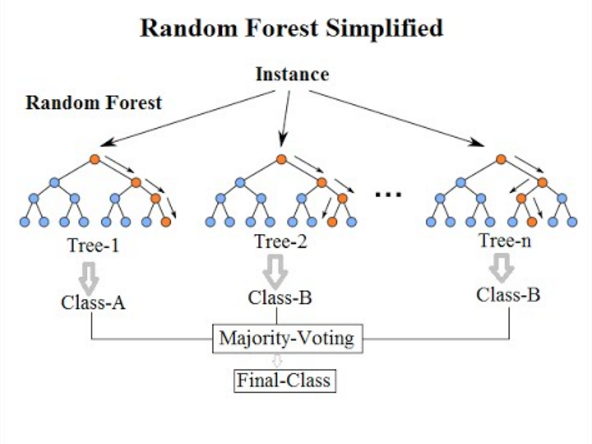

When the random forest algorithm receives the data, it first subsets the data by selecting square root of the Number of columns for classification. It also takes a bootstrap sample of the rows of data. The algorithm will create as many subsets as is the number of trees specified.

Then a decision tree is built using each subset of data and a prediction is computed. A final prediction is computed based on the results of the individual predictions.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model= RandomForestClassifier(n_estimators= 100)

# Train the model using the training sets and check score
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)


The model was trained and now the accuracy is being tested with the test data:

In [24]:
# Showing accuracy of prediction 

print("Random Forest Model Accuracy: ", round(100* accuracy_score(predicted, y_test),2),"%")
#Prediction algorithm shows an accuracy of over 80%

Random Forest Model Accuracy:  84.17 %


<center>Shamar Morgan (B.Eng)<center>
<center>Electrical Engineering<center>
<center>*Data Scientist*<center>

In [25]:
%%html
<script>
    var code_show=true; //true -> hide code at first
    
    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt
        
        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
        
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"><center>[View Code]</center></a>